# Fig 3: Halo-halo correlation coeficient in Fourier space

Figure 3 of `(Asgari,Heymans and Mead 2022)`. The correlation coeffient is defined as:
$R_{\rm hh}= \frac{P_{\rm hh}(M_1, M_2,k)}{\sqrt{P_{\rm hh}(M_1, M_1,k)\; P_{\rm hh}(M_2, M_2,k)}}$, where $M_1$ and $M_2$ are halo masses. In the absence of non-linear halo bias $R_{\rm hh}=1$. We use the DarkEmu which is an emulator for the Dark Quest simulations ([Nishimichi et al. 2019](https://arxiv.org/abs/1811.09504) and 
[Miyatake et al. 2020](https://arxiv.org/abs/2101.00113)) to estimate $R_{\rm hh}$ for various masses.

In [2]:
# Standard imports
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Third-party imports
from dark_emulator import darkemu

# Imports from the halomodel repo
sys.path.append('../modules/')
import DarkQuest 

In [3]:
# Wavenumber range
kmin = 1e-2
kmax = 1e0
nk = 65
ks = np.logspace(np.log10(kmin), np.log10(kmax), nk)
# Redshift
z = 0.

In [4]:
# Start emulator
emu = darkemu.base_class()

# Set cosmological parameters
wb = 0.023
wc = 0.124
Om_w = 0.7
lnAs = 2.716
ns = 0.96
w = -1.

# Initialise emulator
cparam = np.array([wb, wc, Om_w, lnAs, ns, w]) # array for cosmological parameters
emu.set_cosmology(cparam)
print('')

print('Minimum halo mass [log10(Msun/h)]:', np.log10(DarkQuest.minimum_halo_mass(emu)))
print('')

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator

Minimum halo mass [log10(Msun/h)]: 12.287482752446529



In [5]:
# List of mass pairs
M12s = [[10**12.5, 10**13.0],
        [10**12.5, 10**13.5],
        [10**12.5, 10**14.0],
        [10**13.0, 10**13.5],
        [10**13.0, 10**14.0],
        [10**13.5, 10**14.5]
       ]
colors = ['b','orange','g','orange','g','purple']

# Get the Fourier cross-correlation coefficient
Rs = []
for M in M12s:
    R = DarkQuest.R_hh(emu, ks, M[0], M[1], z)
    Rs.append(R)

/Users/Mead/Physics/halomodel_review/notebooks/../modules/DarkQuest.py:533: RuntimeWarning: invalid value encountered in sqrt
  return P12/np.sqrt(P11*P22)


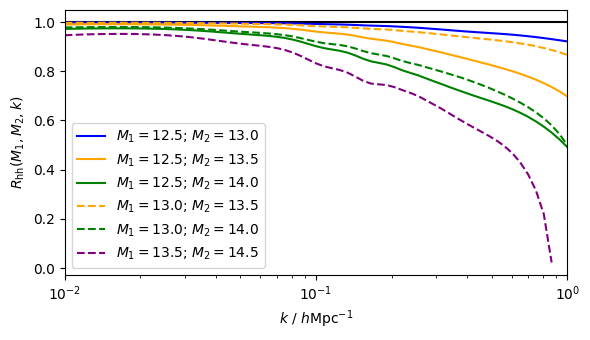

In [6]:
def label(M1, M2):
    return r'$M_1 = %2.1f$; $M_2 = %2.1f$'%(np.log10(M1), np.log10(M2))

# Make plot
plt.subplots(1, 1, dpi=100, figsize=(6,3.5))
plt.axhline(1., color='black')
for i, R in enumerate(Rs):
    if i<3:
        ls="-"
    else:
        ls="--"   
    plt.plot(ks, R,colors[i],ls=ls, label=label(M12s[i][0], M12s[i][1]))
plt.xscale('log')
plt.xlabel('$k$ / $h \mathrm{Mpc}^{-1}$')
plt.xlim((kmin,kmax))
plt.ylabel('$R_\mathrm{hh}(M_1, M_2, k)$')
plt.legend()
plt.tight_layout()
plt.savefig('plots/Rhh.pdf',bbox_inches='tight')
plt.show()